In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import geopandas as gpd

In [14]:
# importamos los datasets
map_df = gpd.read_file("dataset\\geo-data\\barrios\\barrios.geojson")
df = pd.read_csv("dataset\\obra_publica\\obras.csv", header=0)

In [15]:
# ponemos algunos valores en cero y seleccionamos las columnas que nos importan
df = df.fillna(0)
df = df[['Barrio','Comuna','Longitud','Latitud','MetrosCuadrados']]
df['Barrio'] = df['Barrio'].str.upper()
obras_location = df[['Longitud','Latitud']]
obras_location = gpd.GeoDataFrame(geometry=gpd.points_from_xy(obras_location.Longitud, obras_location.Latitud))
df_group_by_barrio = df.groupby(['Barrio'], as_index=False).sum()

In [16]:
# cruzamos los dataframes
merged = map_df.set_index('barrio').join(df_group_by_barrio.set_index('Barrio'))

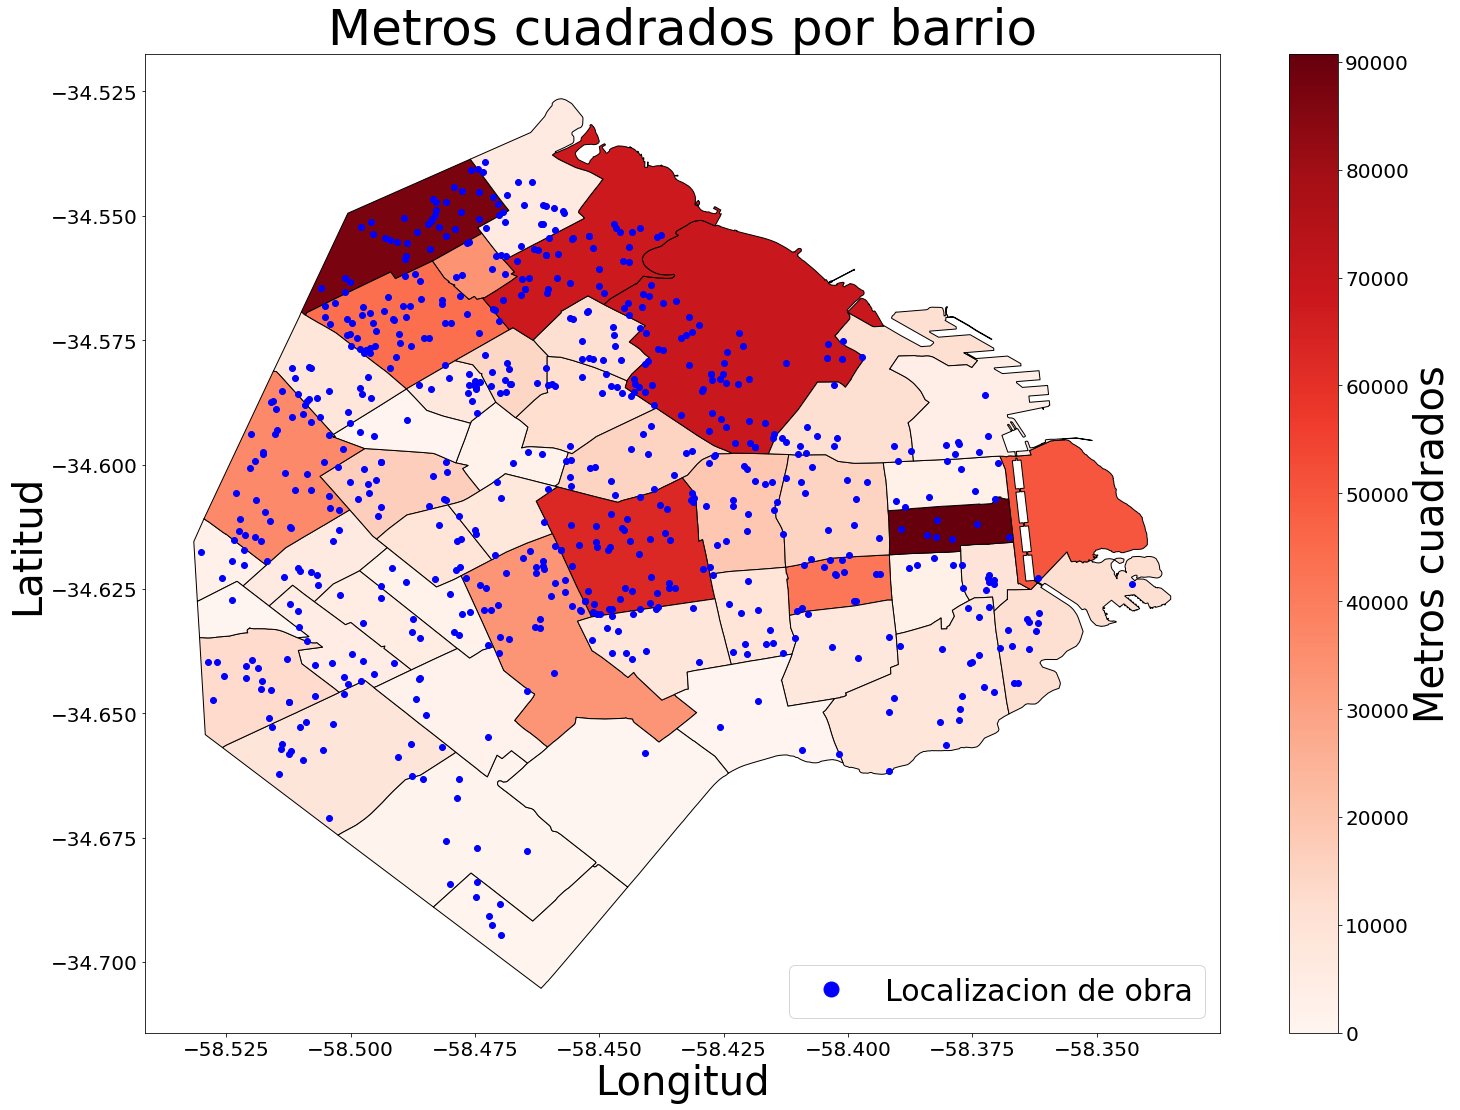

In [18]:
# variable del dataset que queremos plotear
variable = 'MetrosCuadrados'

# valor minimo y maximo que hay en el dataset
vmin = 0
vmax = merged['MetrosCuadrados'].max()

fig, ax = plt.subplots(1, figsize=(25, 18))

# nombre de los ejes
ax.set_xlabel('Longitud', fontsize = 40)
ax.set_ylabel('Latitud', fontsize = 40)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# agregamos un titulo
ax.set_title('Metros cuadrados por barrio', fontdict={'fontsize': '50', 'fontweight' : '12'})

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('Metros cuadrados', fontsize = 40)
cbar.set_ticks(list(range(0,int(vmax),10000)))
cbar.ax.tick_params(labelsize=20)

# creamos el mapa
mapa_calor_base = merged.plot(column=variable, cmap='Reds', linewidth=1, ax=ax, edgecolor='0')
obras_position = obras_location.plot(ax=mapa_calor_base,color='blue')

import matplotlib.lines as mlines
blue_line = mlines.Line2D([], [], color='blue', linestyle='',marker='o', markersize=15, label='Localizacion de obra')
plt.legend(handles=[blue_line], loc='lower right', fontsize=30)
plt.savefig("grafico\\grafico.svg", format="svg")